In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
df=df.drop(columns=['Car_Name'],axis=1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
df['Age']=2021-df['Year']
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [17]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [19]:
df.drop('Year',axis=1,inplace=True)

In [21]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [23]:
df=pd.get_dummies(df,drop_first=True)
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [24]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


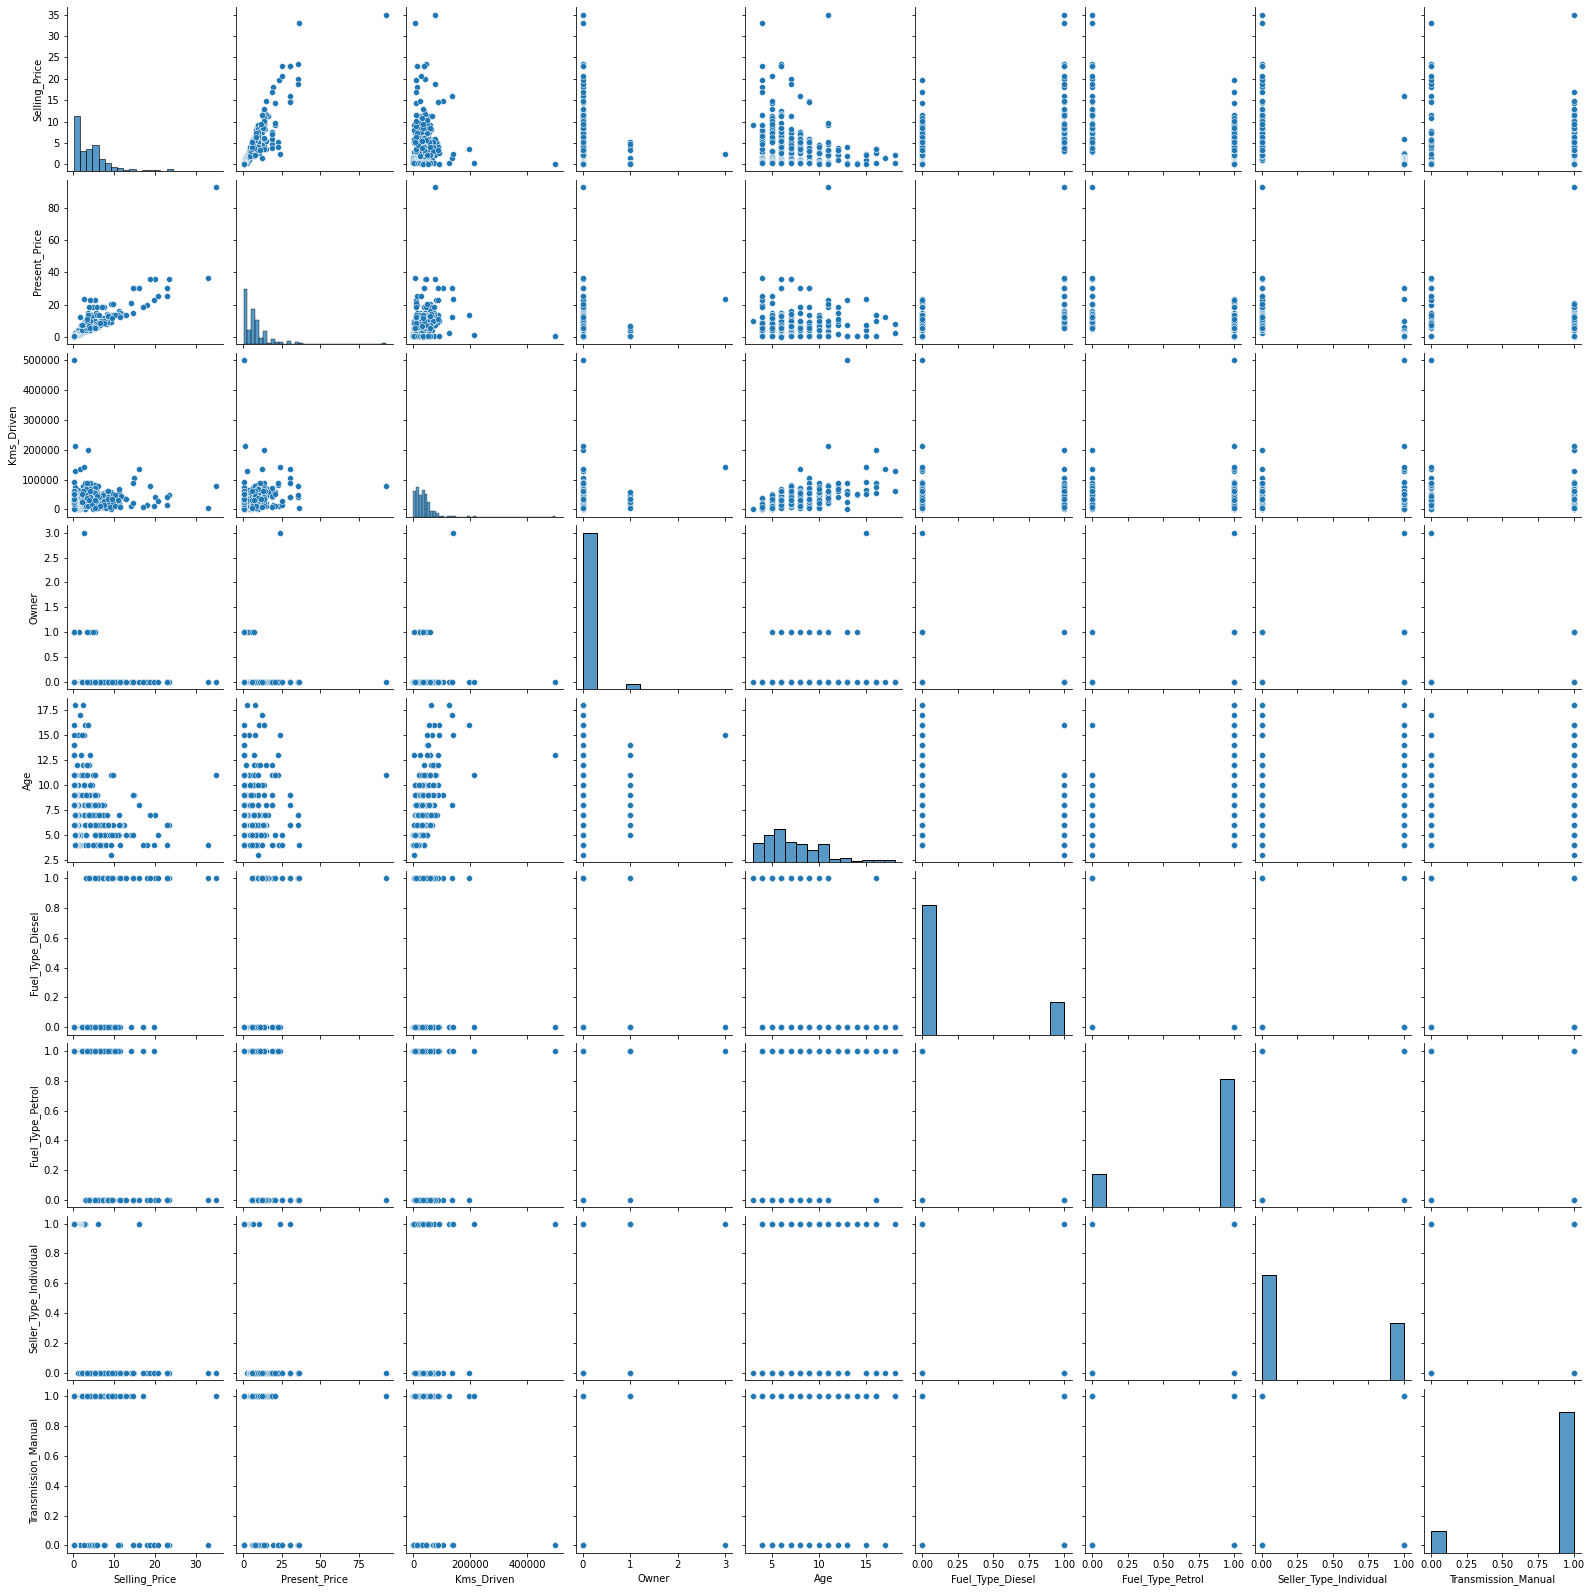

In [25]:
sns.pairplot(df)

In [28]:
corrmat=df.corr()
top_corr_ft=corrmat.index
top_corr_ft

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

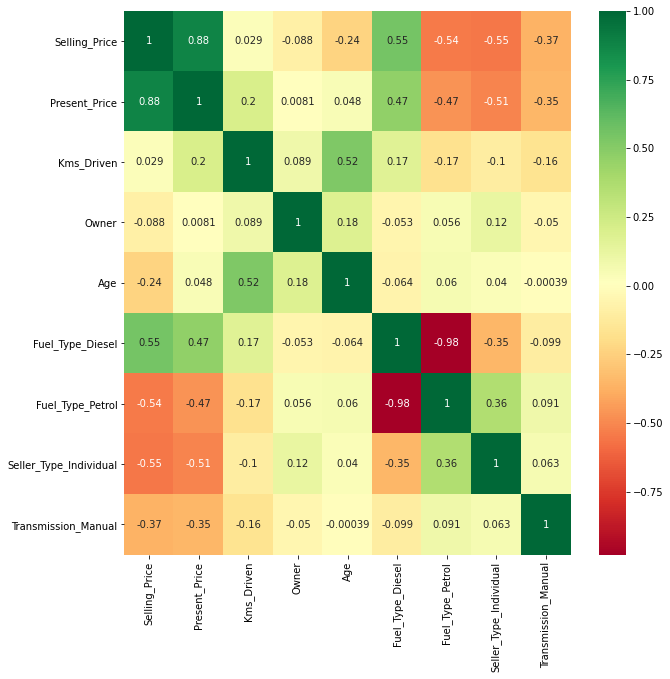

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_ft].corr(),annot=True,cmap="RdYlGn")

In [30]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [33]:
X=df.drop('Selling_Price',axis=1)
X

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [34]:
y=df['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [36]:
model.feature_importances_

array([0.40029177, 0.03941458, 0.00091963, 0.08099364, 0.22243233,
       0.00795316, 0.12320458, 0.12479031])

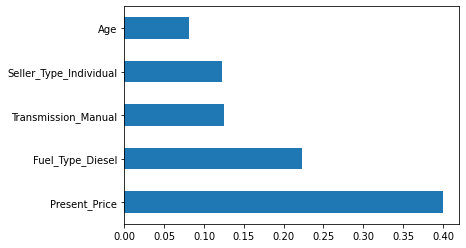

In [37]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
263,7.70,16002,0,5,0,1,0,1
19,7.98,41442,0,11,0,1,0,1
14,7.21,77427,0,12,0,1,0,1
91,16.09,58242,0,7,1,0,0,1
211,14.79,43535,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...
203,4.60,53460,0,10,0,1,0,1
255,5.35,53675,0,9,0,1,0,1
72,18.61,56001,0,8,0,1,0,1
235,9.40,15141,0,4,0,1,0,1


In [44]:
X_test

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
285,8.500,15059,0,5,0,1,0,0
248,4.600,30000,0,8,0,1,0,1
150,0.826,6000,0,10,0,1,1,1
217,4.430,15000,0,5,0,1,0,1
107,1.500,15000,0,8,0,1,1,1
...,...,...,...,...,...,...,...,...
225,4.600,22517,0,10,0,1,0,1
138,0.870,15000,0,5,0,1,1,1
127,0.800,7000,0,5,0,1,1,1
208,8.100,3435,0,4,0,1,0,1


In [45]:
y_train

263     6.60
19      2.65
14      2.25
91     11.25
211    11.75
       ...  
203     2.95
255     3.00
72      7.45
235     9.10
37      0.35
Name: Selling_Price, Length: 210, dtype: float64

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [48]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [49]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [52]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [53]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [54]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [55]:
rf_pred=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


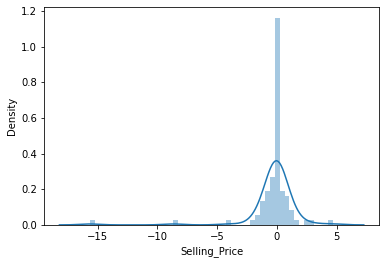

In [58]:
sns.distplot(y_test-rf_pred)

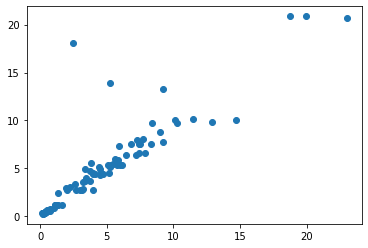

In [59]:
plt.scatter(y_test,rf_pred)

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 0.8250287787950967
MSE: 4.471773248348576
RMSE: 2.114656768449333


In [69]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [62]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [64]:
from sklearn.linear_model import LinearRegression

In [67]:
lr=LinearRegression(normalize=True,fit_intercept=True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [68]:
lr_pred=lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


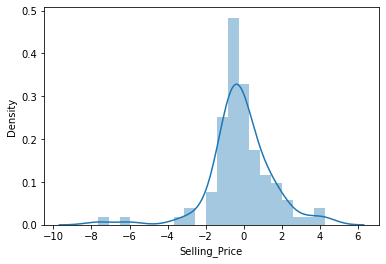

In [71]:
sns.distplot(y_test-lr_pred)

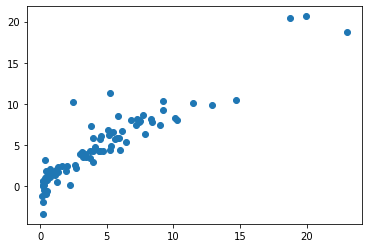

In [72]:
plt.scatter(y_test,lr_pred)

In [73]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 1.101356687498744
MSE: 2.779453229197405
RMSE: 1.6671692263226925


In [74]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

In [79]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()

In [77]:

n_neighbors = [int(x) for x in np.linspace(start = 5, stop = 60, num = 12)]

weights = ['uniform', 'distance']

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

leaf_size = [int(x) for x in np.linspace(start = 30, stop = 60, num = 15)]

p = [1, 2]

In [78]:
kn_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size,
               'p': p}

In [80]:
kn_random = RandomizedSearchCV(estimator = kn, param_distributions = kn_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [81]:
kn_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree 
[CV]  weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree 
[CV]  weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree 
[CV]  weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree 
[CV]  weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree 
[CV]  weights=uniform, p=1, n_neighbors=60, leaf_size=34, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=60, leaf_size=53, algorithm=ball_tree 
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  weights=uniform, p=2, n_neighbors=50, leaf_size=51, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=50, leaf_size=51, algorithm=ball_tree 
[CV]  weights=uniform, p=2, n_neighbors=50, leaf_size=51, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto 
[CV]  weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto 
[CV]  weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto 
[CV]  weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto 
[CV]  weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto, total=   0.0s
[CV] weights=uniform, p=2, n_neighbors=55, leaf_size=42, algorithm=auto 
[CV]  weights=unifo

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30, 32, 34, 36, 38, 40,
                                                      42, 45, 47, 49, 51, 53,
                                                      55, 57, 60],
                                        'n_neighbors': [5, 10, 15, 20, 25, 30,
                                                        35, 40, 45, 50, 55,
  

In [82]:
kn_random.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 51,
 'n_neighbors': 50,
 'p': 2,
 'weights': 'uniform'}

In [83]:
kn_pred=kn_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


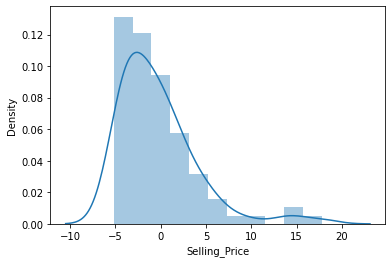

In [84]:
sns.distplot(y_test-kn_pred)

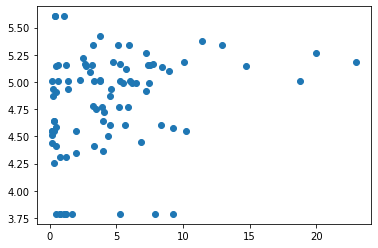

In [86]:
plt.scatter(y_test,kn_pred)

In [87]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, kn_pred))
print('MSE:', metrics.mean_squared_error(y_test, kn_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, kn_pred)))

MAE: 3.220934065934066
MSE: 18.788134870769227
RMSE: 4.334528217784403


In [88]:
import pickle
# open a file, where you ant to store the data
file = open('kneighbors_regression.pkl', 'wb')

# dump information to that file
pickle.dump(kn_random, file)